In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
#!pip install pgeocode
import pgeocode
nomi = pgeocode.Nominatim('IN')
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
invoice_data = pd.read_csv('Final_invoice.csv')
customer_data = pd.read_excel('Customer_Data.xlsx')


In [3]:
invoice_data.head(10)

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2
5,5,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,84457,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200007,12:10:08,174053,2015-01-02,15:15:10,13122,0.00,TOYOTA,0.00,INNOVA,7.005200e+09,851.70,Running Repairs,0.0,14.22,400603,BC01,THANE,NaN,NO,0.0,MH04GM2960,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,865.92,0.0,0.0,0.0,0.0,865.92,BC01SA2
6,6,0.0,0.0,THANE WEST,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,12523,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200008,12:12:31,173953,2015-01-02,12:15:55,26964,0.00,HONDA,0.00,CITY,7.005200e+09,749.42,Running Repairs,0.0,0.00,400607,BC01,THANE,NaN,NO,0.0,MH06AL1935,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,749.42,0.0,0.0,0.0,0.0,749.42,BC01SA2
7,7,0.0,0.0,G.B. ROAD,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,55220,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200009,12:18:54,174254,2015-01-03,12:02:32,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,7.005200e+09,0.00,Running Repairs,0.0,0.00,400606,BC01,THANE,NaN,NO,0.0,MH04FR8641,0.0,0.0,0.0,0.0,NaN,0.0,SAMEER,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
8,8,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,84511,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200010,13:07:27,174162,2015-01-03,10:21:26,18563,0.00,TATA MOTORS,0.00,INDIGO,7.005200e+09,0.00,Running Repairs,0.0,0.00,400607,BC01,THANE,NaN,NO,0.0,MH05BJ558,0.0,0.0,0.0,0.0,NaN,0.0,HARSHAD,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA1
9,9,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,Na

In [4]:
customer_data.head(10)

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT
5,45,9,1.0,Z003,NaN,NaN,NaN,NaN,NaT
6,46,10,1.0,Z005,NaN,2.0,31.0,NaN,NaT
7,47,11,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,49,13,9001.0,Z003,NaN,2.0,NaN,1981-05-18 00:00:00,NaT
9,50,14,1.0,Z005,NaN,NaN,NaN,NaN,NaT


In [5]:
print("invoice data shape" , invoice_data.shape)
print("customer data shape" ,customer_data.shape)

invoice data shape (492314, 59)
customer data shape (555338, 9)


In [55]:
customer_data.isnull().sum()

Business Partner    0
Customer No.        0
Partner Type        0
Data Origin         0
dtype: int64

In [6]:
## dropping records more than 50% missing values from customer data 
customer_data = customer_data.drop(['Title','Marital Status','Occupation','Date of Birth','Death date'],axis=1)

# Imputing Partner type & Data origin with mode

customer_data['Partner Type'] = customer_data['Partner Type'].fillna(customer_data['Partner Type'].mode()[0])
customer_data['Data Origin'] = customer_data['Data Origin'].fillna(customer_data['Data Origin'].mode()[0])

In [7]:
invoice_data.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID'],
     

In [8]:
## dropping records more than 50% missing values
invoice_data = invoice_data.drop(['Amt Rcvd From Custom','Amt Rcvd From Ins Co',
                                          'CGST(14%)','CGST(2.5%)', 'CGST(6%)','IGST(12%)','CGST(9%)',
                                          'IGST(18%)','IGST(28%)','IGST(5%)','SGST/UGST(14%)',
                                          'SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)',
                                          'TDS amount','Service Advisor Name','Outstanding Amt',
                                        'Total CGST','Total GST','Total IGST','Total SGST/UGST',
                                          'Policy no.','Cash /Cashless Type','Expiry Date','Gate Pass Date',
                                          'Insurance Company','Claim No.'
                                         ],axis=1)

### Deriving invoice date time , job card date time & service time

In [9]:
invoice_data.head(5)

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2


In [10]:
invoice_data["Invoice_DateTime"]=invoice_data["Invoice Date"]+' '+invoice_data["Invoice Time"]
invoice_data["JobCard_DateTime"]=invoice_data["JobCard Date"]+' '+invoice_data["JobCard Time"]
invoice_data['JobCard_DateTime'] = pd.to_datetime(invoice_data['JobCard_DateTime'],dayfirst=True)
invoice_data['Invoice_DateTime'] = pd.to_datetime(invoice_data['Invoice_DateTime'],dayfirst=True)
invoice_data["Service_Time"]=invoice_data["Invoice_DateTime"]-invoice_data["JobCard_DateTime"]

In [11]:
invoice_data.drop(['JobCard Date','JobCard Time','Invoice Date','Invoice Time'],axis = 1,inplace=True)

In [12]:
invoice_data.head(5)

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35


### Cleaning "Area/Locality", "City" and "District" columns using pgeocode library  

In [69]:
nomi.query_postal_code('441904')

postal_code                            441904
country code                               IN
place_name        Bhandara Town, Bhandara H.O
state_name                        Maharashtra
state_code                                 16
county_name                          Bhandara
county_code                               506
community_name                       Bhandara
community_code                            NaN
latitude                              21.1612
longitude                             79.9317
accuracy                                    1
Name: 0, dtype: object

In [64]:
invoice_data["Clean_Location_Area"]=nomi.query_postal_code(np.array(invoice_data["Pin code"].astype(str))).place_name
invoice_data["Clean_CITY"]=nomi.query_postal_code(np.array(invoice_data["Pin code"].astype(str))).community_name
invoice_data["Clean_District"]=nomi.query_postal_code(np.array(invoice_data["Pin code"].astype(str))).county_name
invoice_data["Clean_State"]=nomi.query_postal_code(np.array(invoice_data["Pin code"].astype(str))).state_name

In [65]:
invoice_data.head(50)

,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra
1,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
2,2,Retail,81055,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
3,3,Retail,84419,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
4,4,Retail,18980,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
5,5,Retail,84457,00:00:00,7005200007,174053,13122,0.00,TOYOTA,0.00,INNOVA,851.70,Running Repairs,14.22,400603,BC01,THANE,NO,0.0,865.92,BC01SA2,2015-01-03 12:10:08,2015-01-02 15:15:10,0 days 20:54:58.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
6,6,Retail,12523,00:00:00,7005200008,173953,26964,0.00,HONDA,0.00,CITY,749.42,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,749.42,BC01SA2,2015-01-03 12:12:31,2015-01-02 12:15:55,0 days 23:56:36.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
7,7,Retail,55220,00:00:00,7005200009,174254,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,0.00,Running Repairs,0.00,400606,BC01,THANE,NO,0.0,0.00,BC01SA2,2015-01-03 12:18:54,2015-01-03 12:02:32,0 days 00:16:22.000000000,Jekegram,Thane,Thane,Maharashtra
8,8,Retail,84511,00:00:00,7005200010,174162,18563,0.00,TATA MOTORS,0.00,INDIGO,0.00,Running Repairs,0.00,400607,BC01,THANE,NO,0.0,0.00,BC01SA1,2015-01-03 13:07:27,2015-01-03 10:21:26,0 days 02:46:01.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
9,9,Retail,84457,00:00:00,7005200011,174203,5443,698.92,MARUTI SUZUKI,49.99,ALTO,499.95,Paid Service,2663.75,400603,BC01,THANE,NO,0.0,3912.61,BC01SA1,2015-01-03 15:54:21,2015-01-03 11:11:00,0 days 04:43:21.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra


### Dropping old "Area/Locality", "City" and "District" columns 

In [16]:
invoice_data.drop(["Area / Locality","CITY","District"],1,inplace=True)


In [17]:
invoice_data.head(5)

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra
1,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
2,2,Retail,81055,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
3,3,Retail,84419,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
4,4,Retail,18980,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,"Thane East, Kopri Colony",Thane,Thane,Maharashtra


### Storing Cleaned Invoice & Customer Data 

In [18]:
invoice_data.to_csv('Invoice_Data.csv')
customer_data.to_csv('Customer_Data.csv')

### Reading cleaned Invoice & Customer Data 

In [19]:
invoice_data = pd.read_csv('Invoice_Data.csv',index_col= False)
customer_data = pd.read_csv('Customer_Data.csv',index_col = False)
jtd_data = pd.read_csv('JTD.csv')

In [20]:
print("invoice data shape" , invoice_data.shape)
print(" customer data shape" ,customer_data.shape)
print(" jtd data shape", jtd_data.shape)

invoice data shape (492314, 33)
 customer data shape (555338, 5)
 jtd data shape (5619484, 10)


In [21]:
customer_data.isnull().sum()

Unnamed: 0          0
Business Partner    0
Customer No.        0
Partner Type        0
Data Origin         0
dtype: int64

In [22]:
invoice_data.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Cust Type                   0
Customer No.                0
Gate Pass Time              0
Invoice No                  0
Job Card No                 0
KMs Reading                 0
Labour Total                0
Make                        0
Misc Total                  0
Model                    1525
ODN No.                197286
OSL Total                   0
Order Type                  0
Parts Total                 0
Pin code                    0
Plant                       0
Plant Name1                 0
Print Status                0
Recovrbl Exp                0
Regn No                    16
Technician Name        236834
Total Amt Wtd Tax.          0
Total Value            197286
User ID                     0
Invoice_DateTime            0
JobCard_DateTime            0
Service_Time                0
Clean_Location_Area     47246
Clean_CITY              53980
Clean_District          47246
Clean_State             47246
dtype: int

In [23]:
jtd_data.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [24]:
customer_data

,Unnamed: 0,Business Partner,Customer No.,Partner Type,Data Origin
0,0,31,1,1.0,Z001
1,1,32,2,1.0,Z005
2,2,34,4,1.0,Z005
3,3,35,5,1.0,Z005
4,4,42,7,1.0,Z008
...,...,...,...,...,...
555333,555333,PLX506,PLX506,1.0,Z005
555334,555334,PLX507,PLX507,1.0,Z005
555335,555335,PLX508,PLX508,1.0,Z005
555336,555336,PLX555,PLX555,1.0,Z005


In [25]:
invoice_data.head(5)

,Unnamed: 0,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State
0,0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra
1,1,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
2,2,2,Retail,81055,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
3,3,3,Retail,84419,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
4,4,4,Retail,18980,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra


In [26]:
jtd_data.head(5)

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


#### Dropping unncessary columns & columns with more missing values

In [27]:
# # dropping unnecessary columns
customer_data.drop(['Unnamed: 0'],axis=1,inplace=True)
invoice_data.drop(['Unnamed: 0','ODN No.','Technician Name','Regn No','Total Value'],axis=1,inplace=True)
jtd_data.drop(['Unnamed: 0','Labor Value Number'],axis=1,inplace=True)

In [28]:
jtd_data.head()

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [29]:
invoice_data.head()

,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra
1,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
2,2,Retail,81055,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra
3,3,Retail,84419,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra
4,4,Retail,18980,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra


In [59]:
invoice_data.isnull().sum()

Unnamed: 0.1               0
Cust Type                  0
Customer No.               0
Gate Pass Time             0
Invoice No                 0
Job Card No                0
KMs Reading                0
Labour Total               0
Make                       0
Misc Total                 0
Model                   1525
OSL Total                  0
Order Type                 0
Parts Total                0
Pin code                   0
Plant                      0
Plant Name1                0
Print Status               0
Recovrbl Exp               0
Total Amt Wtd Tax.         0
User ID                    0
Invoice_DateTime           0
JobCard_DateTime           0
Service_Time               0
Clean_Location_Area    47246
Clean_CITY             53980
Clean_District         47246
Clean_State            47246
dtype: int64

In [30]:
customer_data.isnull().sum()

Business Partner    0
Customer No.        0
Partner Type        0
Data Origin         0
dtype: int64

### Joining Invoice & Customer Data

In [31]:
inv_cust = pd.merge(invoice_data,customer_data,how='left',on='Customer No.')

In [32]:
inv_cust.shape

(492314, 31)

In [33]:
inv_cust.head()

,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State,Business Partner,Partner Type,Data Origin
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra,NaN,NaN,NaN
1,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra,NaN,NaN,NaN
2,2,Retail,81055,00:00:00,7005200004,173889,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,"Chitalsar Manpada, Sandozbaugh",Thane,Thane,Maharashtra,NaN,NaN,NaN
3,3,Retail,84419,00:00:00,7005200005,174158,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra,NaN,NaN,NaN
4,4,Retail,18980,00:00:00,7005200006,173860,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra,NaN,NaN,NaN


### Joining inv_cust with jtd data

#### grouping the jtd data on dbm order to reduce duplicate order entries

In [34]:
jtd_data

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
...,...,...,...,...,...,...,...,...
5619479,962813,50,ACCT_SRV,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00
5619480,962813,60,ACCT_SRV,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00
5619481,962813,70,TOYOTA_SRV,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00
5619482,962813,80,ACCT_SRV,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00


In [35]:
jtd_group=jtd_data.groupby(["DBM Order","Item Category"],as_index=False).agg({"Net value":'sum',"Order Quantity":"sum"})


In [36]:
jtd_group

,DBM Order,Item Category,Net value,Order Quantity
0,4,P001,3455.92,714.0
1,4,P002,11042.62,15.6
2,4,P010,2399.95,1.0
3,4,P011,100.00,1.0
4,5,P001,2310.47,283.0
...,...,...,...,...
1735305,1001282,P001,0.00,1.0
1735306,1001283,P001,2804.28,6600.0
1735307,1001284,P001,0.00,97.0
1735308,1001291,P001,37262.66,1234.0


In [37]:
jtd_group.shape

(1735310, 4)

In [38]:
invoice_customer_jtd=pd.merge(inv_cust,jtd_group,how="left",left_on="Job Card No",right_on="DBM Order")

In [39]:
invoice_customer_jtd.head(5)

,Unnamed: 0.1,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_Location_Area,Clean_CITY,Clean_District,Clean_State,Business Partner,Partner Type,Data Origin,DBM Order,Item Category,Net value,Order Quantity
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra,NaN,NaN,NaN,168303.0,P001,1203.14,73.0
1,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra,NaN,NaN,NaN,168303.0,P002,2348.75,6.5
2,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,"Thane Bazar, Thane H.O, Thane R.S.",Thane,Thane,Maharashtra,NaN,NaN,NaN,168303.0,P010,500.06,1.0
3,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra,NaN,NaN,NaN,173997.0,P001,804.26,170.0
4,1,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,"Thane East, Kopri Colony",Thane,Thane,Maharashtra,NaN,NaN,NaN,173997.0,P011,197.03,1.0


In [40]:
invoice_customer_jtd.describe()

,Unnamed: 0.1,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Recovrbl Exp,Total Amt Wtd Tax.,Partner Type,DBM Order,Net value,Order Quantity
count,936275.000000,9.362750e+05,936275.000000,9.362750e+05,936275.000000,936275.000000,936275.000000,936275.000000,936275.000000,936275.000000,936275.000000,41526.000000,936236.000000,936236.000000,936236.000000
mean,557359.965813,7.073255e+09,237990.751269,7.735107e+04,1568.368569,168.532733,671.226106,3370.881313,438566.690014,1.928977,5779.008720,1.112773,237982.663383,2336.466976,140.451470
std,313826.864218,8.007813e+07,140851.606003,1.082626e+05,3639.537017,1301.140053,2982.982570,9374.166558,166104.347497,79.086824,12891.836053,0.376967,140848.485325,6907.737087,1046.982515
min,0.000000,7.000000e+09,4.000000,0.000000e+00,-137.000000,-0.010000,0.000000,-0.010000,0.000000,0.000000,-137.000000,1.000000,4.000000,-47.990000,0.000000
25%,116089.500000,7.000119e+09,119165.500000,3.569550e+04,198.900000,0.000000,0.000000,0.000000,396195.000000,0.000000,648.880000,1.000000,119159.750000,200.000000,1.000000
50%,664682.000000,7.027204e+09,230244.000000,6.090700e+04,749.010000,0.000000,0.000000,1191.810000,423101.000000,0.000000,2567.990000,1.000000,230234.500000,772.640000,7.000000
75%,787264.500000,7.157400e+09,355820.000000,9.379200e+04,1598.165000,99.990000,0.000000,3346.900000,600001.000000,0.000000,5985.940000,1.000000,355807.250000,2098.080000,72.000000
max,984740.000000,7.241600e+09,499962.000000,9.999999e+06,323000.000000,350000.000000,119444.190000,598003.480000,999999.000000,21000.260000,648203.490000,3.000000,499962.000000,598003.480000,145260.000000


In [41]:
invoice_customer_jtd.isnull().sum()

Unnamed: 0.1                0
Cust Type                   0
Customer No.                0
Gate Pass Time              0
Invoice No                  0
Job Card No                 0
KMs Reading                 0
Labour Total                0
Make                        0
Misc Total                  0
Model                    3185
OSL Total                   0
Order Type                  0
Parts Total                 0
Pin code                    0
Plant                       0
Plant Name1                 0
Print Status                0
Recovrbl Exp                0
Total Amt Wtd Tax.          0
User ID                     0
Invoice_DateTime            0
JobCard_DateTime            0
Service_Time                0
Clean_Location_Area     94162
Clean_CITY             108927
Clean_District          94162
Clean_State             94162
Business Partner       894749
Partner Type           894749
Data Origin            894749
DBM Order                  39
Item Category              39
Net value 

In [42]:
invoice_customer_jtd.shape

(936275, 35)

In [43]:
invoice_customer_jtd.to_csv('cleaned_merged_data.csv')

In [44]:
plant_data = pd.read_excel('Plant Master.xlsx')
plant_data.head(10)

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka
5,X005,X005 - KLN MOTORS,X005,PLX005,NaN,IN,Chennai,"No.8 (NP) Developed Plot,",600032.0,600032,Chennai,MFCB,Tamil Nadu
6,X006,X006 - A.M.MOTORS,X006,PLX006,NaN,IN,Mumbai,"8, Mira, Behind Ajit Palace Ho",401104.0,401104,Thane,MFCB,Maharashtra
7,X007,X007 - OM SRI SATYA SAI AUTOMO,X007,PLX007,NaN,IN,Bengaluru,"Seegehalli main road,",560037.0,560037,Bengaluru,MFCB,Karnataka
8,X008,X008- AAKASH AUTO (Puducherry),X008,PLX008,NaN,IN,Puducherry,"145/2, Villiyanur main road,",605110.0,605110,Puducherry,MFCC,Puducherry
9,X010,X010 - LVM MOTORS,X010,PLX010,NaN,IN,Chennai,"B- 49 Emerald Nagar, SIPCOT,",632406.0,632406,Ranipet,MFCD,Tamil Nadu


In [45]:
plant_data.State.unique()

array(['Tamil Nadu', 'Punjab', 'Maharashtra', 'Uttar Pradesh',
       'Karnataka', 'Puducherry', 'Andhra Pradesh', 'Chhattisgarh',
       'Haryana', 'Madhya Pradesh', 'Uttarakhand', 'Kerala', 'Telangana',
       'Himachal Pradesh', 'Rajasthan', 'Bihar', 'Chandigarh',
       'West Bengal', 'Odisha', 'Gujarat', 'Goa', 'Jharkhand', 'Assam',
       'Manipur', 'Jammu and Kashmir', 'Nagaland', 'Delhi'], dtype=object)

In [46]:
plant_data.drop(["Customer no. - plant","Vendor number plant","Factory calendar","PO Box"],1,inplace=True)

In [47]:
plant_data.drop("Valuation Area",1,inplace=True)

In [48]:
plant_data.drop("Name 2",1,inplace=True)

In [49]:
my_tab = pd.crosstab(index=plant_data["State"],  # Make a crosstab
                              columns="Plant")      # Name the count column
my_tab

col_0,Plant
State,
Andhra Pradesh,15
Assam,7
Bihar,21
Chandigarh,1
Chhattisgarh,5
Delhi,1
Goa,1
Gujarat,13
Haryana,20


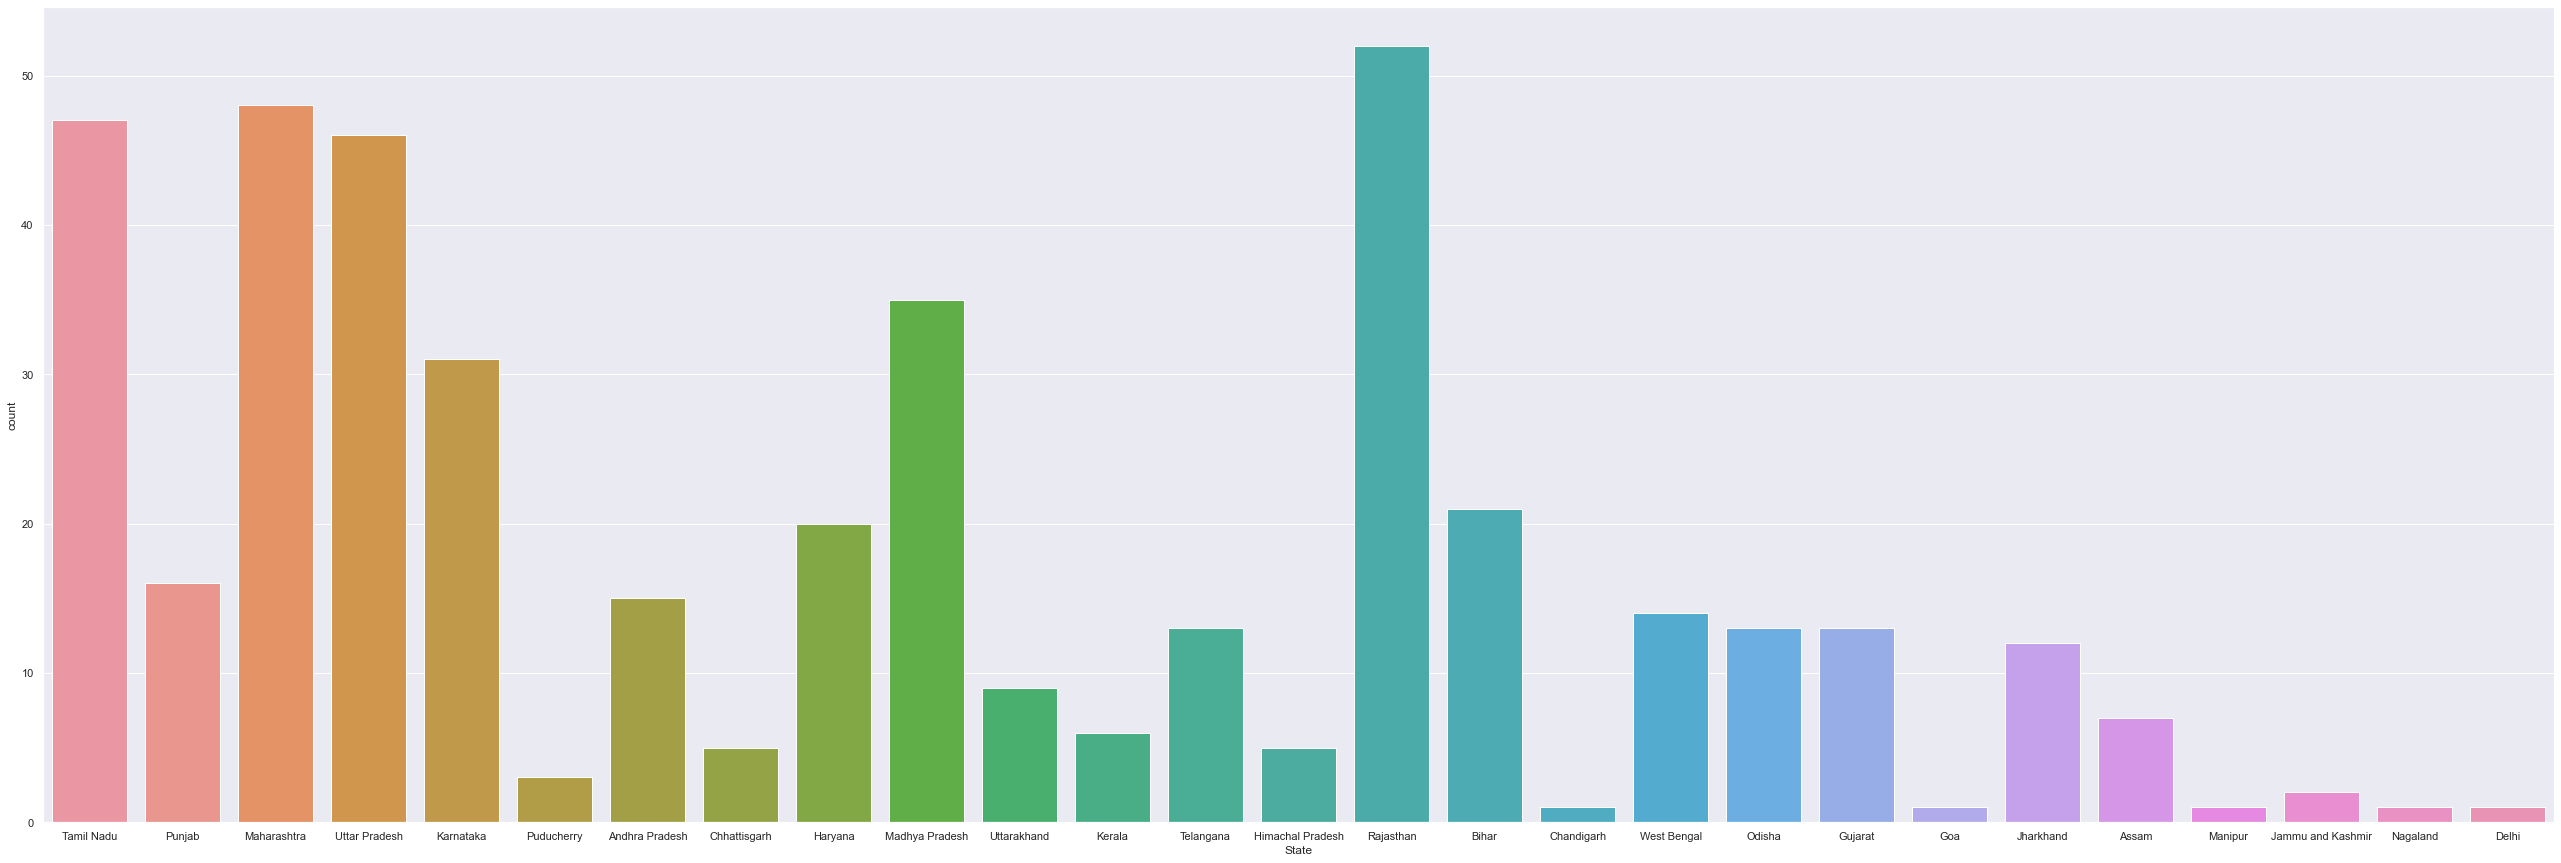

In [72]:
import seaborn as sns
plt.figure(figsize=(45,15))
sns.set(style="darkgrid")

ax = sns.countplot(x="State", data=plant_data)

Creating zones which will be easier for our Analysis

In [51]:
north_state=['Uttar Pradesh','Delhi','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Jammu and Kashmir']
filt1=plant_data['State'].isin(north_state)
north_zone=plant_data.loc[filt1]

In [52]:
north_zone.State.value_counts() 

Uttar Pradesh        46
Haryana              20
Punjab               16
Uttarakhand           9
Himachal Pradesh      5
Jammu and Kashmir     2
Delhi                 1
Name: State, dtype: int64

In [53]:
my_tab = pd.crosstab(index=north_zone.State,  # Make a crosstab
                              columns="Total_Plant")      # Name the count column
my_tab

col_0,Total_Plant
State,
Delhi,1
Haryana,20
Himachal Pradesh,5
Jammu and Kashmir,2
Punjab,16
Uttar Pradesh,46
Uttarakhand,9


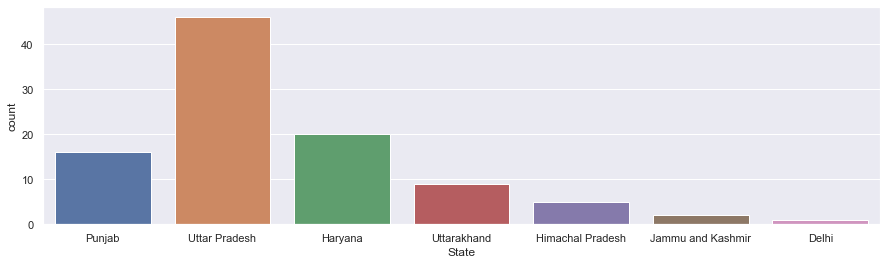

In [54]:
import seaborn as sns
plt.figure(figsize=(15,4))
sns.set(style="darkgrid")

ax = sns.countplot(x="State", data=north_zone)

plt.show()